In [0]:
import scipy.io.wavfile as wf
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from IPython.display import Audio

In [0]:
def load_wav(filename):
  rate, data = wf.read(filename)
  return np.trim_zeros(data[:,0]/32767.0)[:96000]

In [0]:
all = load_wav("drive/My Drive/COS 302/all.wav")
parts = [load_wav("drive/My Drive/COS 302/{}.wav".format(fn)) for fn in ['1', '2', '3', '4', '5', '6', '7', '8']]
offsets = [np.argmax(np.convolve(all, np.flip(part)))-96000 for part in parts]
offset_parts = []
for ii in range(8):
  offset_parts.append(np.pad(parts[ii], offsets[ii])[:96000])
wavs = np.array(offset_parts)

In [20]:
Audio(np.tile(all, 5), rate=48000)

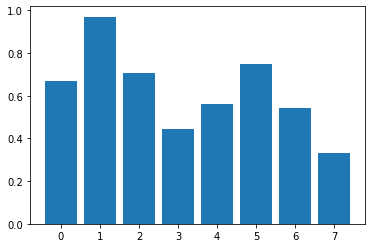

In [35]:
mix = npr.rand(8)
plt.bar(range(8), mix)
Audio(np.tile(np.dot(wavs.T, mix), 5), rate=48000, autoplay=True)

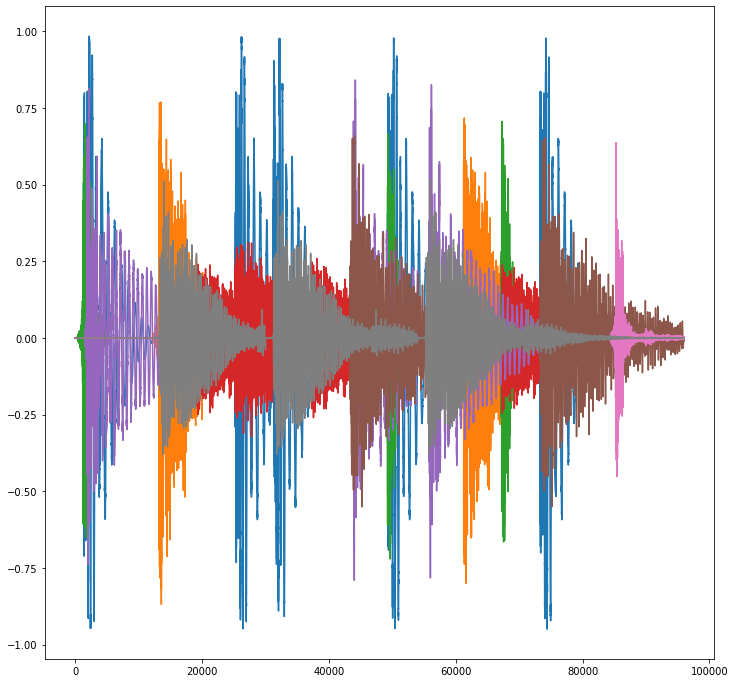

In [0]:
plt.figure(figsize=(12,12))
plt.plot(wavs.T)

In [31]:
Audio(wavs[3,:], rate=48000, autoplay=True)